In [1]:
import librosa
import wave, os, glob
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [6]:
path = 'data_prep/audio/'
arr = []

for filename in glob.glob(os.path.join(path, '*.wav')):
    #import the audio file using librosa 
    audio, sr = librosa.load(filename, mono=False, sr=16000)
    arr.append(filename)
    print(f"Samplerate: {sr}. Lenght: {librosa.get_duration(y=audio, sr=sr)} Filename : {filename} - {audio.shape}")

Samplerate: 16000. Lenght: 6.0 Filename : data_prep/audio/pneumaticbreaker.wav - (96000,)
Samplerate: 16000. Lenght: 6.0 Filename : data_prep/audio/saw.wav - (96000,)
Samplerate: 16000. Lenght: 6.0 Filename : data_prep/audio/forklift.wav - (96000,)
Samplerate: 16000. Lenght: 6.0 Filename : data_prep/audio/crane.wav - (96000,)
Samplerate: 16000. Lenght: 6.0 Filename : data_prep/audio/excavator.wav - (96000,)
Samplerate: 16000. Lenght: 6.0 Filename : data_prep/audio/piledriver.wav - (96000,)
Samplerate: 16000. Lenght: 6.0 Filename : data_prep/audio/concretepumper.wav - (96000,)


In [8]:
arr

['data_prep/audio/pneumaticbreaker.wav',
 'data_prep/audio/saw.wav',
 'data_prep/audio/forklift.wav',
 'data_prep/audio/crane.wav',
 'data_prep/audio/excavator.wav',
 'data_prep/audio/piledriver.wav',
 'data_prep/audio/concretepumper.wav']

In [21]:
fs = 16000
nfft = 1024
hopsize = 320 # 640 for 20 ms
mel_bins = 128
window = 'hann'
fmin = 50

audio_File = arr[6]
print(audio_File)

audio_v1, sr_v1 = librosa.load('output.wav', mono=False, sr=fs)

print(audio_v1.shape)

data_prep/audio/concretepumper.wav
(79872,)


In [22]:
# Calculate the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio_v1, sr=sr_v1)

# Convert the power spectrogram to dB scale
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

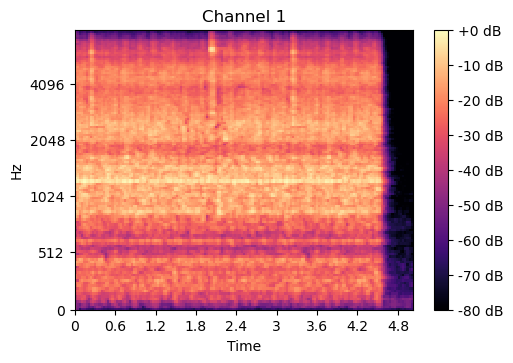

In [23]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(12, 8))

# Subplot 1
plt.subplot(2, 2, 1)
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='magma')
plt.title('Channel 1')
plt.colorbar(format='%+2.0f dB')

# Subplot 2
# plt.subplot(2, 2, 2)
# librosa.display.specshow(spectrogram_db[1], x_axis='time', y_axis='mel', sr=sr, cmap='magma')
# plt.title('Channel 3')
# plt.colorbar(format='%+2.0f dB')

# # Subplot 3
# plt.subplot(2, 2, 3)
# librosa.display.specshow(spectrogram_db[2], x_axis='time', y_axis='mel', sr=sr, cmap='magma')
# plt.title('Channel 3')
# plt.colorbar(format='%+2.0f dB')

# # Subplot 4
# plt.subplot(2, 2, 4)
# librosa.display.specshow(spectrogram_db[3], x_axis='time', y_axis='mel', sr=sr, cmap='magma')
# plt.title('Channel 3')
# plt.colorbar(format='%+2.0f dB')

# plt.tight_layout()
# plt.show()

In [25]:
# Play the audio
# ipd.Audio(audio_v1[0], rate=fs)


In [ ]:
ipd.Audio(audio_v1[1], rate=fs)

In [ ]:
ipd.Audio(audio_v1[2], rate=fs)

In [ ]:
# Play the audio
ipd.Audio(audio_v1[3], rate=fs)

In [ ]:
import numpy as np
from sklearn.metrics import average_precision_score

# Assuming you have two sets of prediction scores for two classes or labels
# Replace the following data with your actual prediction scores
y_true = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                   [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                   [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                   [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                   [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

y_scores = np.array([[0.6672865, 0.47163847, 0.48967358, 0.37500808, 0.4072699, 0.46611172, 0.37311083],
                     [0.6672865, 0.47163847, 0.48967358, 0.37500808, 0.4072699, 0.46611172, 0.37311083],
                     [0.6672865, 0.47163847, 0.48967358, 0.37500808, 0.4072699, 0.46611172, 0.37311083],
                     [0.6672865, 0.47163847, 0.48967358, 0.37500808, 0.4072699, 0.46611172, 0.37311083],
                     [0.6672865, 0.47163847, 0.48967358, 0.37500808, 0.4072699, 0.46611172, 0.37311083]])


average_precisions = average_precision_score(y_true, y_scores)
                        
                        
print("Average Precision Scores:", average_precisions)


Average Precision Scores: nan


/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/software/spackages/linu